In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

In [3]:
df = pd.read_csv("diabetes.csv", header=None,names=col_names)

In [4]:
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [5]:
df=df.drop([0])

In [6]:
df.reset_index(drop=True)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.34,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X=df.drop(['label','skin'],axis='columns')

In [8]:
X.head()

,pregnant,glucose,bp,insulin,bmi,pedigree,age
1,6,148,72,0,33.6,0.627,50
2,1,85,66,0,26.6,0.351,31
3,8,183,64,0,23.3,0.672,32
4,1,89,66,94,28.1,0.167,21
5,0,137,40,168,43.1,2.288,33


In [9]:
Y=df.label

In [10]:
Y.head()

1    1
2    0
3    1
4    0
5    1
Name: label, dtype: object

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [12]:
model=DecisionTreeClassifier()

In [13]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
y_pred = model.predict(X_test)

In [15]:
y_pred

array(['1', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1',
       '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '0', '1', '0',
       '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '0',
       '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0',
       '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0',
       '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0',
       '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0',
       '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1',
       '1', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0',
       '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1',
       '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1',
       '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1',
       '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1

In [16]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7229437229437229


In [17]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
model=model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7575757575757576


In [21]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

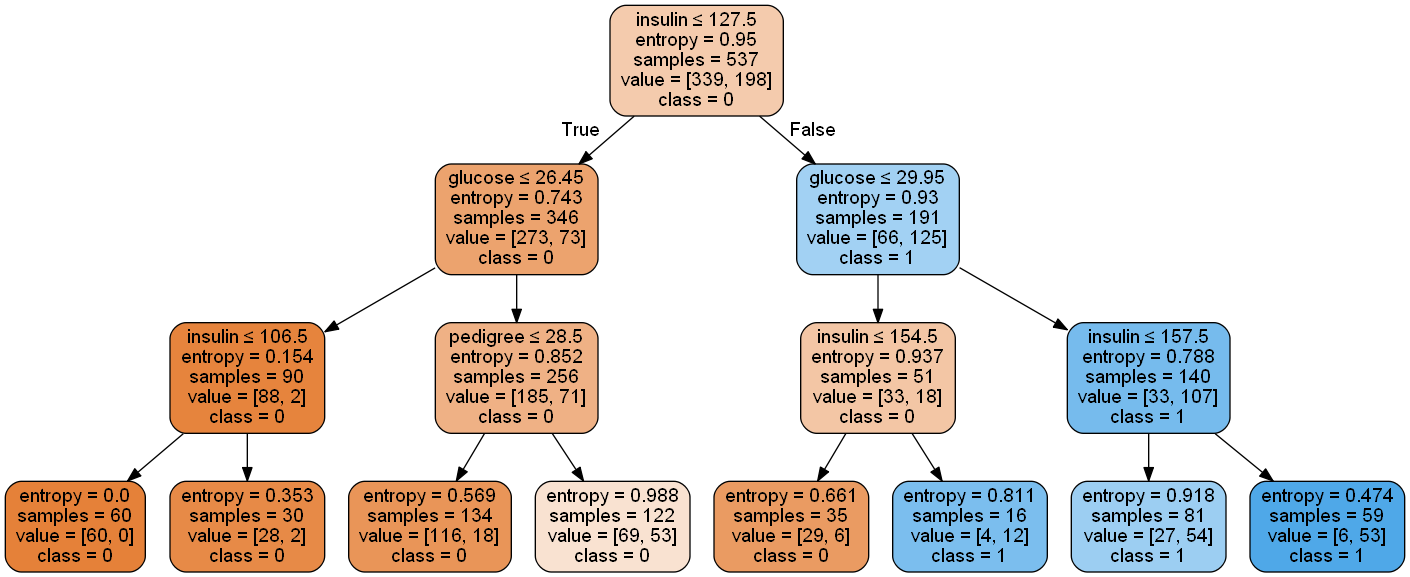

In [22]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())